In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.integrate as integrate
import scipy.special as special
import math as mt

# Definindo a Função Gaussiana

In [2]:
n = 1000

def gauss (x, 𝜎, 𝜇):
    return ((1/(𝜎*np.sqrt(2*np.pi)))*np.exp(-(((x-𝜇)**2)/(2*𝜎**2))))

x = np.linspace(-10, 10, num=n)
y = gauss(x, 𝜎 = 1, 𝜇 = 0)
#plt.plot(x,y)

# Definindo a Interpolação e comparando as duas

998
998


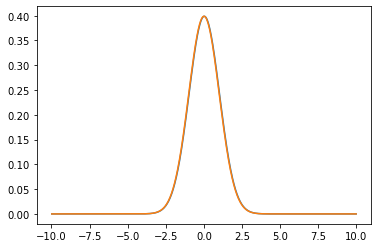

In [3]:
def interpolation(y,x):
    z=[]
    for i in range(n-2):
        j = i + 1
        a = (y[i+1]-y[i-1])/(x[i+1]- x[i-1])
        b = y[i-1] - a*x[i-1]
        p = a*x[i] + b
        z.append(p)
    return z

px = np.delete(np.delete(x, n-1), 0) 
py = np.delete(np.delete(y, n-1), 0) 
z = interpolation(y,x)
plt.plot(px,z)
plt.plot(px,py)
print(np.size(px))
print(np.size(z))

# Definindo a Função erro

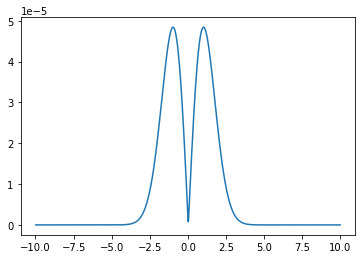

In [4]:
def erro (z, py):
    e=(np.sqrt((py - z)**2))/100
#    e = (py - z)/100
    return e

o = erro(z,py)
#print(np.size(o))
plt.plot(px,o)

<ipython-input-2-a8f82d48b83b>:4: RuntimeWarning: divide by zero encountered in double_scalars
  return ((1/(𝜎*np.sqrt(2*np.pi)))*np.exp(-(((x-𝜇)**2)/(2*𝜎**2))))
<ipython-input-2-a8f82d48b83b>:4: RuntimeWarning: divide by zero encountered in true_divide
  return ((1/(𝜎*np.sqrt(2*np.pi)))*np.exp(-(((x-𝜇)**2)/(2*𝜎**2))))
<ipython-input-2-a8f82d48b83b>:4: RuntimeWarning: invalid value encountered in multiply
  return ((1/(𝜎*np.sqrt(2*np.pi)))*np.exp(-(((x-𝜇)**2)/(2*𝜎**2))))


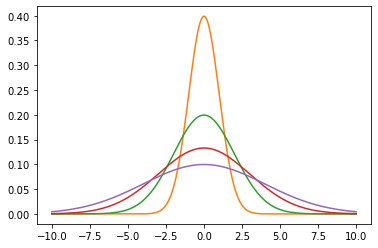

In [5]:
for i in range(5):
    plt.plot(x,gauss(x, i, 𝜇 = 0))

# Função Cumulativa

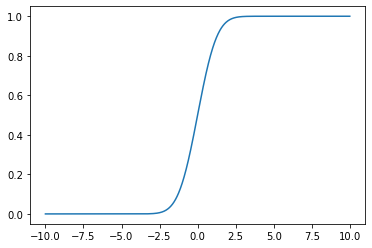

In [6]:
#lin[]
#for i in range(n-1):
r = 40
result=[]
for i in range(n):
    result1 = integrate.quad(lambda x: gauss(x, 𝜎 = 1, 𝜇 = 0), x[0], x[i])
    result.append(result1[0])
    

plt.plot(x,result)

# Teste para gerar números aleatórios em uma distribuição Gaussiana

1000


(array([  1.,   2.,   6.,  15.,  27.,  38.,  72.,  92., 113., 124., 111.,
        125., 108.,  64.,  45.,  27.,  19.,   6.,   4.,   1.]),
 array([-3.34998165, -3.02421033, -2.69843901, -2.37266769, -2.04689638,
        -1.72112506, -1.39535374, -1.06958242, -0.7438111 , -0.41803978,
        -0.09226847,  0.23350285,  0.55927417,  0.88504549,  1.21081681,
         1.53658813,  1.86235944,  2.18813076,  2.51390208,  2.8396734 ,
         3.16544472]),
 <BarContainer object of 20 artists>)

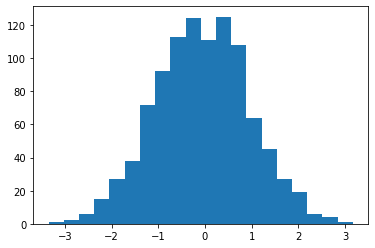

In [7]:
u = 1000
m = np.random.normal(0,1, u)
#plt.hist(m, bins=30)

for i in range(u-1):
    if np.sqrt((m [i + 1] - m [i])**2) < 0.1:
        m [i+1] = m[i]

print(np.size(m))
plt.hist(m, bins=20)

# Gerando uma lista de números de vezes que a moeda deu cara ou coroa

(array([  5.,  16.,  72., 143., 218., 221., 184.,  93.,  40.,   8.]),
 array([447. , 457.1, 467.2, 477.3, 487.4, 497.5, 507.6, 517.7, 527.8,
        537.9, 548. ]),
 <BarContainer object of 10 artists>)

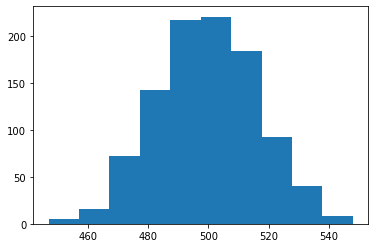

In [8]:
def moeda_honesta (numero_sample, numero_lancamentos):
    escolhas = [0,1]
    cara = 0
    coroa = 0
    lista_coroa = []
    lista_cara = []
    for i in range (numero_sample):
        for i in range (numero_lancamentos): 
    
            x = np.random.choice(escolhas)
    
            if x == 0:
                coroa += 1
            else:
                cara +=1
        lista_coroa.append(coroa)
        lista_cara.append(cara)  
        coroa = 0
        cara = 0
    return (lista_coroa)

lista = moeda_honesta(1000,1000)

plt.hist(lista)

# Verossimilhança de uma moeda honesta

(array([65.,  9.,  8.,  0.,  6.,  4.,  0.,  3.,  0.,  5.]),
 array([1.01819516e-12, 6.67376021e-09, 1.33465022e-08, 2.00192442e-08,
        2.66919862e-08, 3.33647283e-08, 4.00374703e-08, 4.67102123e-08,
        5.33829543e-08, 6.00556963e-08, 6.67284383e-08]),
 <BarContainer object of 10 artists>)

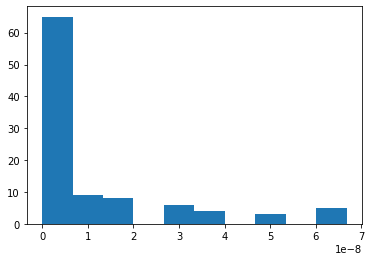

In [9]:
def likelihood (num_sample, num_lanca):
    escolhas = [0,1]
    cara = 0
    coroa = 0
    lik = []
    p = 1/2
    for i in range (num_sample):
        for i in range (num_lanca): 
  
            x = np.random.choice(escolhas)
    
            if x == 0:
                coroa += 1
            else:
                cara +=1
        L = (p**coroa)*((1-p)**(num_lanca))*((mt.factorial(num_lanca))/((mt.factorial(num_lanca-coroa))*(mt.factorial(coroa))))
        lik.append(L)
        coroa = 0
        cara = 0
    return (lik)

lista = likelihood(100,50)
plt.hist(lista)

In [10]:
p = 0.5
coroa = 20
num_lanca = 100
L = (p**coroa)*((1-p)**(num_lanca))*((mt.factorial(num_lanca))/((mt.factorial(num_lanca-coroa))*(mt.factorial(coroa))))
L

4.0322907138839546e-16

# Melhorando a Interpolação

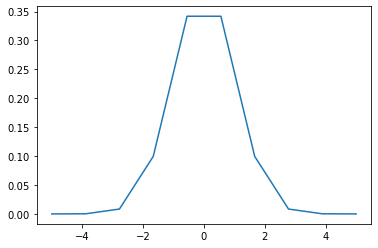

In [11]:
def interpolation(t,y,x):
    coef = []
    
    for i in range(np.size(x)-1):
        j = i + 1
        aa = (y[i+1]-y[i])/(x[i+1]- x[i])
        bb = y[i] - aa*x[i]
        coef.append([aa,bb])
    
    q = []
    for i in range (np.size(t)):
        for j in range (np.size(x)-1):
            if x[j] < t [i] and  t[i] < x[j+1]:
                qq = (coef[j][0]) * t[i] + (coef[j][1])
                q.append(qq)
    return (q)

t = np.linspace (-5, 5, 10)

r = interpolation(t, y, x)

plt.plot(t, r)

# Calculando a cumulativa

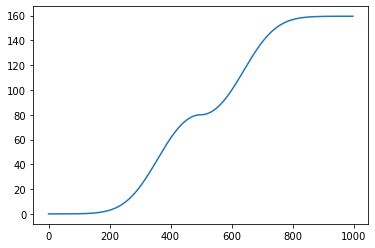

In [12]:
x = np.linspace(-5, 5, 1000)
y = gauss(x, 𝜎 = 1, 𝜇 = 0)

def cumulativa(y,x):
    coef = []
    
    for i in range(np.size(x)-1):
        aa = (y[i+1]-y[i])/(x[i+1]- x[i])
        bb = y[i] - aa*x[i]
        coef.append([aa,bb])
    
    p = []
    pp = 0
    for i in range (np.size(x)-1):
        pp += np.sqrt(((coef[i][0]) *  ((x[i]**2)/2) + (coef[i][1]) * x[i])**2)
        p.append(pp)
    return (p)

r = cumulativa(y,x)

plt.plot(r)
#plt.plot(x,y)

# Verossimilhança arrumada

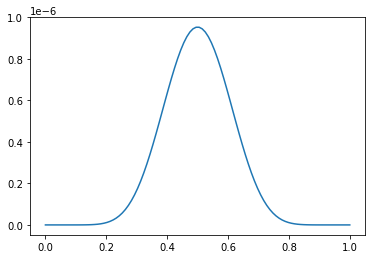

In [13]:

    num_lanca = 10
    coroa = 10
    lik = []
    pp = np.linspace(0,1,100)
    
    for i in range (np.size(pp)):
        p = pp[i]
        L = (p**coroa)*((1-p)**(num_lanca))*((mt.factorial(num_lanca))/((mt.factorial(num_lanca-coroa))*(mt.factorial(coroa))))
        lik.append(L)


plt.plot(pp,lik)

# Calculando a Cumulativa por Soma de Riemman

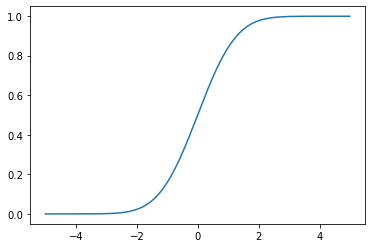

In [14]:
l = 1000
z = np.linspace(-5,5,l)


def somarmn (z,y,x):
    v = interpolation(x,y,z)
    deltax = ((z[l-1])-z[0])/l
    b = []
    bb = 0
    for i in range (l-1):
        bb += y[i]*deltax
        b.append(bb)
    return (b)

ff = somarmn (z,y,x)

plt.plot(x[0:n-1], ff)

# Invertendo a Cumulativa

998

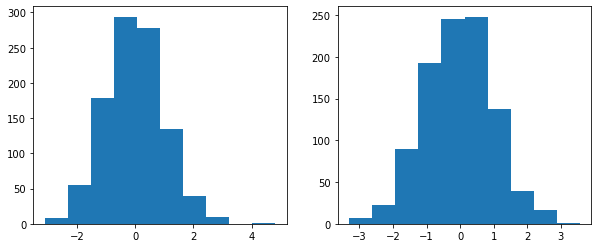

In [15]:
ttt = np.linspace(0,1,1000)
t=[]

for i in range(np.size(ttt)):
    mmm = np.random.choice(ttt)
    t.append(mmm)

ii = interpolation (t, x, ff)


ww = np.random.normal(0, 1, 1000)

#plt.hist(ii)
#plt.hist(ww)
fig, ax=plt.subplots(1,2,figsize=(10,4))
ax[0].hist(ii)
ax[1].hist(ww)
np.size(ii)